In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("data/health_screenings_2020_1000ea.xlsx")

In [57]:
data.columns

Index(['year', 'city_code', 'gender', 'age_code', 'height', 'weight', 'waist',
       'eye_left', 'eye_right', 'hear_left', 'hear_right', 'systolic',
       'diastolic', 'blood_sugar', 'cholesterol', 'triglycerides', 'HDL',
       'LDL', 'hemoglobin', 'urine_protein', 'serum', 'AST', 'ALT', 'GTP',
       'smoking', 'drinking', 'oral_check', 'dental_caries', 'tartar',
       'open_date'],
      dtype='object')

In [58]:
# 정보를 가진 데이터프레임 생성
data1 = data.loc[:,['gender', 'height', 'weight', 'waist', 'smoking', 'drinking']]

In [59]:
gender ={1:'male', 2:'female'}

In [60]:
# 성별, 음주 여부 별 음주 인원 수
drinking = data1.groupby(['gender', 'drinking'])['drinking'].count()
drinking = drinking.to_frame(name='count')
drinking = drinking.reset_index()
drinking['gender'] = drinking['gender'].map(gender)
drinking['drinking'] = drinking['drinking'].replace(0,'Non-drinking').replace(1, 'Drinking')
drinking

,gender,drinking,count
0,male,Non-drinking,126
1,male,Drinking,356
2,female,Non-drinking,305
3,female,Drinking,213


In [61]:
smoking = data1.groupby(['gender', 'smoking'])['smoking'].count()
smoking = smoking.to_frame(name='count')
smoking = smoking.reset_index()
smoking['gender'] = smoking['gender'].map(gender)
smoking['smoking'] = smoking['smoking'].replace(1,'Non-smoking').replace(2, 'Non-smoking').replace(3, 'Smoking')
smoking

,gender,smoking,count
0,male,Non-smoking,145
1,male,Non-smoking,176
2,male,Smoking,161
3,female,Non-smoking,488
4,female,Non-smoking,12
5,female,Smoking,18


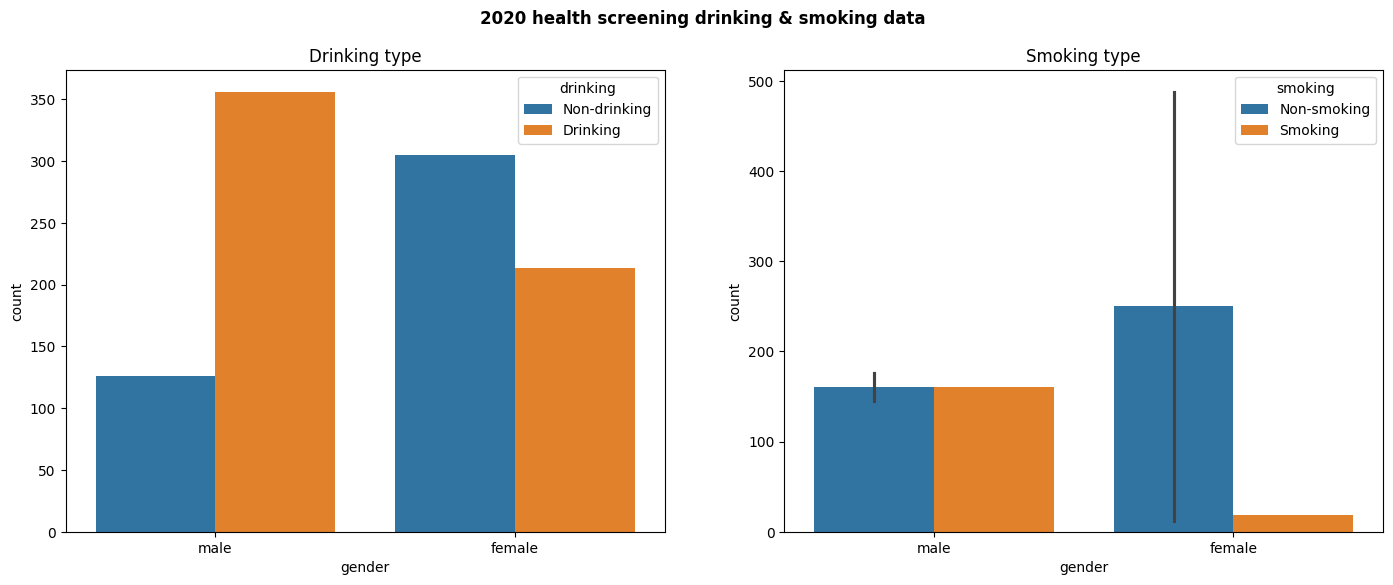

In [69]:
# 성별 음주 여부 및 흡연 상태 막대 그래프
fig = plt.figure(figsize=(17, 6)) # 캠퍼스 크기 설정

area1 = fig.add_subplot(1, 2, 1) # 1행에 2열짜리를 만들며 1번째 것
area2 = fig.add_subplot(1, 2, 2) # 2번째 것

ax1 = sns.barplot(data=drinking, x='gender', y='count', hue='drinking', ax=area1)
ax2 = sns.barplot(data=smoking, x='gender', y='count', hue='smoking', ax=area2)

fig.suptitle('2020 health screening drinking & smoking data', fontweight='bold')
ax1.set_title('Drinking type')
ax2.set_title('Smoking type')

plt.show()

In [71]:
# 데이터셋 생성
data2 = data.loc[:, ['gender', 'weight', 'waist']]

In [72]:
# 상관관계 확인 / - 는 반비례 하고 있다라는 뜻
data2.corr()

,gender,weight,waist
gender,1.000000,-0.582641,-0.431970
weight,-0.582641,1.000000,0.787645
waist,-0.431970,0.787645,1.000000


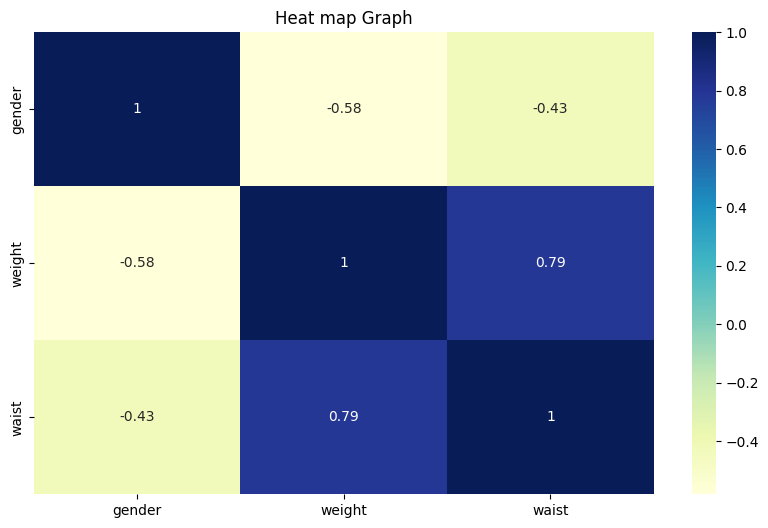

In [80]:
plt.figure(figsize=(10, 6))
plt.title('Heat map Graph')

corr_data1 = data2.corr()
# annot=True 를 사용하여 값 표현, cmap='값'을 통해 히트맵 색 변경
sns.heatmap(data=corr_data1, annot=True, cmap='YlGnBu')

plt.show()